In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

In [3]:
train_it, validation_it, test_it = h.construct_data_generator_w_validation()

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


data/train/027901.png


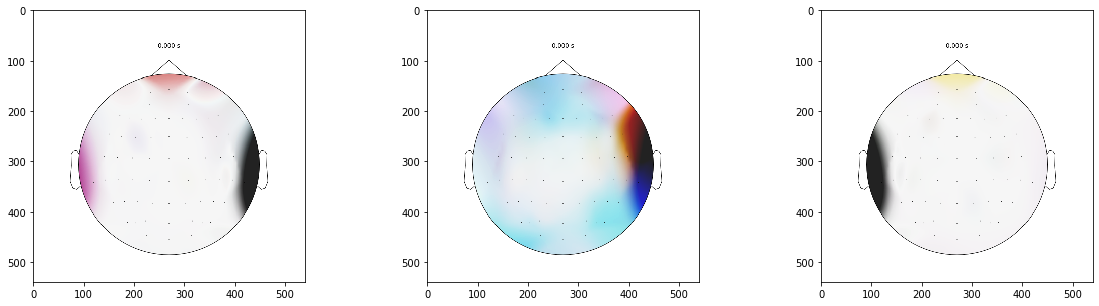

In [4]:
h.plot_examples()

data/test/028041.png


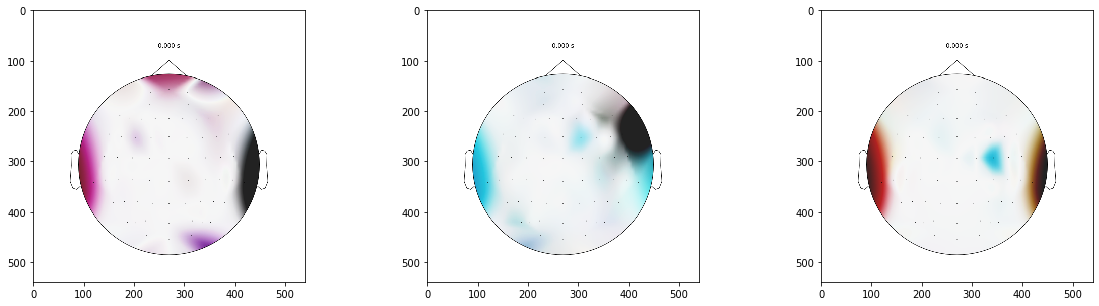

In [5]:
h.plot_examples('test')

In [6]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(16, (5,5), padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides = (2,2)))
    model.add(Conv2D(32, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides =(2,2)))
    model.add(Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (1,1), strides =(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [7]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [8]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

In [9]:
model = build_model(opt, loss, 'cnn_topomap_classification_model')

Model: "cnn_topomap_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None

In [10]:
r = model.fit_generator(train_it, epochs=150, callbacks=[tb_log], validation_data=validation_it)

Epoch 1/80
173/173 [==============================] - 102s 588ms/step - loss: 1.0907 - accuracy: 0.3741 - val_loss: 1.0583 - val_accuracy: 0.4425
Epoch 2/80
173/173 [==============================] - 97s 560ms/step - loss: 1.0159 - accuracy: 0.4822 - val_loss: 0.9290 - val_accuracy: 0.5517
Epoch 3/80
173/173 [==============================] - 97s 561ms/step - loss: 0.8938 - accuracy: 0.5711 - val_loss: 0.8256 - val_accuracy: 0.6222
Epoch 4/80
173/173 [==============================] - 97s 561ms/step - loss: 0.8041 - accuracy: 0.6252 - val_loss: 0.7164 - val_accuracy: 0.6876
Epoch 5/80
173/173 [==============================] - 97s 560ms/step - loss: 0.7355 - accuracy: 0.6650 - val_loss: 0.6479 - val_accuracy: 0.7171
Epoch 6/80
173/173 [==============================] - 97s 560ms/step - loss: 0.6813 - accuracy: 0.6941 - val_loss: 0.6058 - val_accuracy: 0.7416
Epoch 7/80
173/173 [==============================] - 97s 560ms/step - loss: 0.6437 - accuracy: 0.7168 - val_loss: 0.5544 - val_a

173/173 [==============================] - 97s 563ms/step - loss: 0.2315 - accuracy: 0.9077 - val_loss: 0.2620 - val_accuracy: 0.9016
Epoch 58/80
173/173 [==============================] - 97s 562ms/step - loss: 0.2295 - accuracy: 0.9077 - val_loss: 0.2577 - val_accuracy: 0.9063
Epoch 59/80
173/173 [==============================] - 97s 561ms/step - loss: 0.2295 - accuracy: 0.9063 - val_loss: 0.2558 - val_accuracy: 0.9054
Epoch 60/80
173/173 [==============================] - 97s 564ms/step - loss: 0.2308 - accuracy: 0.9069 - val_loss: 0.2411 - val_accuracy: 0.9098
Epoch 61/80
173/173 [==============================] - 97s 563ms/step - loss: 0.2262 - accuracy: 0.9088 - val_loss: 0.2525 - val_accuracy: 0.9048
Epoch 62/80
173/173 [==============================] - 98s 565ms/step - loss: 0.2266 - accuracy: 0.9085 - val_loss: 0.2470 - val_accuracy: 0.9124
Epoch 63/80
173/173 [==============================] - 97s 563ms/step - loss: 0.2205 - accuracy: 0.9110 - val_loss: 0.2408 - val_accurac

In [15]:
evaluate = model.evaluate_generator(test_it)

In [ ]:
y_prob = model.predict_generator(test_it)

In [16]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_1_100')

model saved, path: models/cnn_topomap_classification_model_1.h5


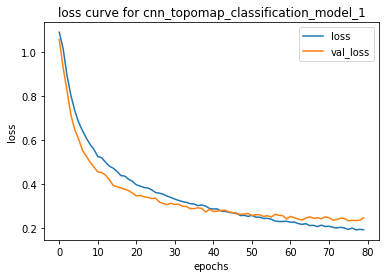

In [70]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_1_100')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_1_100.png')

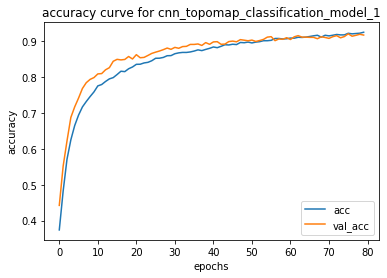

In [71]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_1_100')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_1_100.png')